# 資料匯入

In [11]:
import pandas as pd
from sklearn.datasets import load_iris
x = load_iris()
print(x['data'])
print(x['feature_names'])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [12]:
y = []
for i in x['target']:
    if i == 0:
        y.append('setosa')
    elif i == 1:
        y.append('versicolor')
    elif i == 2:
        y.append('virginica')
        

In [13]:
df = pd.DataFrame(x['data'],columns=x['feature_names'])
tn = pd.DataFrame(y, columns=['target_names'])
data = pd.concat([df,tn],axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 切分資料 (為作圖方便，先只選取兩個features)

In [46]:
from sklearn.model_selection import train_test_split

X = data[['sepal length (cm)','sepal width (cm)']]
y = data['target_names']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

### 標準化

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 一、KNN
可調整k, weight (uniform, distance)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

### 準確度 & 混淆矩陣

In [66]:
print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std),labels=['setosa', 'versicolor', 'virginica']))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.67      0.71      0.69        14
  virginica       0.73      0.69      0.71        16

avg / total       0.80      0.80      0.80        45

[[15  0  0]
 [ 0 10  4]
 [ 0  5 11]]


### 視覺化混淆矩陣函式（from scikit-learn官網）

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Source code from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Confusion matrix, without normalization
[[15  0  0]
 [ 0 10  4]
 [ 0  5 11]]


/Users/BlackSung/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


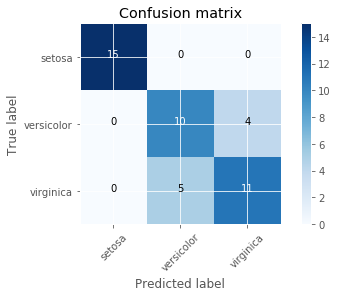

In [68]:
cnf_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test_std))
target_names = ['setosa', 'versicolor', 'virginica']

plot_confusion_matrix(cnf_matrix, classes=target_names) #注意：targeet_names必須和confusion_matrix中labels的順序一致
plt.show()

In [67]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(knn,X_train_std, y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[ 0.72727273  0.80952381  0.76190476  0.71428571  0.6       ]
0.722597402597


/Users/BlackSung/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


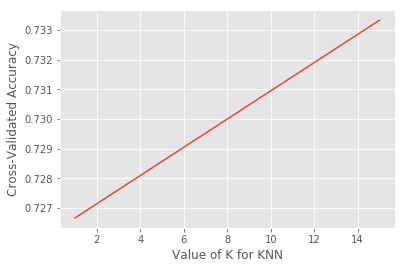

In [55]:
k_range = [1,15]
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number, weights='distance')
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## 決策邊界

/Users/BlackSung/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


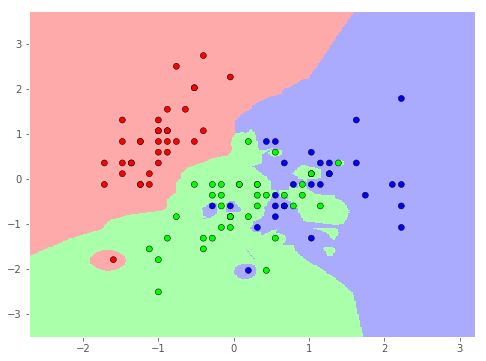

In [69]:
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
import matplotlib.patches as mpatches

# 把類別轉成0,1,2，散佈圖上色用
le = preprocessing.LabelEncoder()
le.fit(['setosa', 'versicolor', 'virginica'])
y_color = le.transform(y_train)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h = .02  # 著色時每格大小
# 設定x,y邊界、著色格子
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# 預測、類別轉成0,1,2
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = le.transform(Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,6))

# 上色
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# 資料散佈
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_color, cmap=cmap_bold, edgecolor='k')
# x,y邊界設定
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [86]:
X_train_std[:, 1].min()

-2.1070871628888206

# 二、決策分類樹
可調整Gini或Entropy，決策樹可不用做資料標準化

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", feature_names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],
                class_names=['setosa', 'versicolor', 'virginica'])

### 執行dot前須先安裝graphviz
在Anaconda中安裝graphviz，或是到官網下載：http://www.graphviz.org/Download..php

In [19]:
!dot -Tpng tree.dot -o tree.png

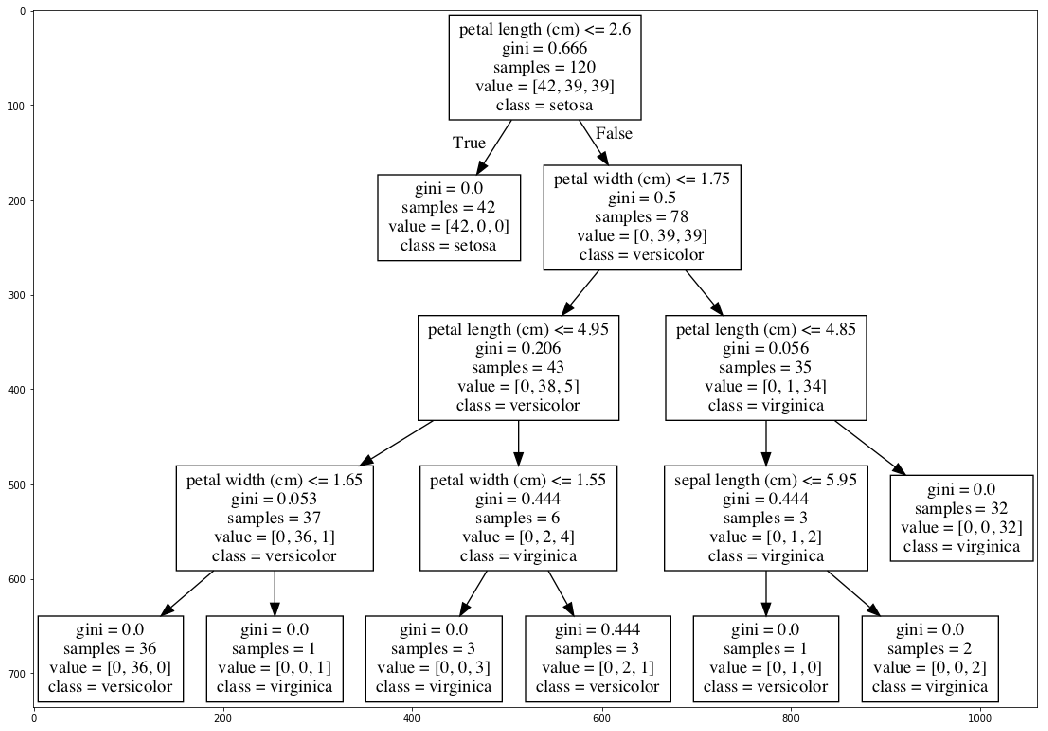

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img = mpimg.imread('tree.png')
fig = plt.figure(figsize=(18,20))
plt.imshow(img)

In [23]:
print(metrics.classification_report(y_test, tree.predict(X_test)))
print(metrics.confusion_matrix(y_test, tree.predict(X_test),labels=['setosa', 'versicolor', 'virginica']))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       1.00      1.00      1.00        11
  virginica       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]


## 特徵重要性

In [26]:
tree.feature_importances_.tolist()
df = pd.DataFrame({'feature':['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],'feature_importance':tree.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df

,feature,feature_importance
0,petal length (cm),0.582372
1,petal width (cm),0.400668
2,sepal length (cm),0.016960
3,sepal width (cm),0.000000


In [70]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%f'%float(height),
                ha='center', va='bottom')

/Users/BlackSung/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


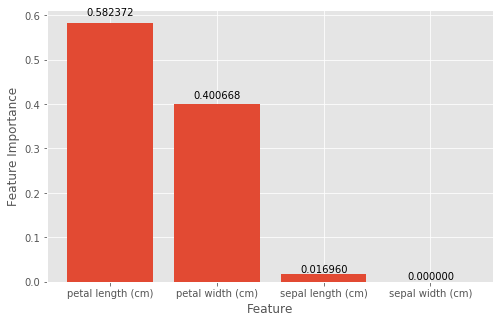

In [29]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(8,5))
plt.rcParams['font.family']='SimHei'

gini = plt.bar(df.index,df['feature_importance'],align='center')
plt.xlabel('Feature') #X軸名稱
plt.ylabel('Feature Importance') #Y軸名稱
plt.xticks(df.index, df['feature']) #X軸項目名稱

autolabel(gini)

plt.show()

# 三、SVM
可調整kernel、C值

In [30]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf")
svc.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
print(metrics.classification_report(y_test, svc.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, svc.predict(X_test_std),labels=['setosa', 'versicolor', 'virginica']))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       1.00      1.00      1.00        11
  virginica       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]


# 四、貝式分類器
通常適合處理包含文字的分類，如：垃圾信件、正負評

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)

GaussianNB(priors=None)

In [21]:
print(metrics.classification_report(y_test, gnb.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, gnb.predict(X_test_std),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.61      0.85      0.71        13
 Iris-virginica       0.80      0.53      0.64        15

    avg / total       0.82      0.80      0.80        45

[[17  0  0]
 [ 0 11  2]
 [ 0  7  8]]


### it's your turn...